# FUNDAMENTOS DE ROBÓTICA MÓVIL 

## TP°1: Módelo cinemático y odometría en robot de tracción diferencial.

### Profesores:
#### Gonzalo Perez Paina
#### David Gaydou
#### Diego Gonzalez Dondo

### Alumnos:
#### Escobar Daniela   72705
#### Ippolitti Rubén      8634 
#### Molins Rodrigo     75569 

## Objetivo

#### Comprender el modelo cinemático y la estimación de pose (posición y orientación) mediante el cálculo de odometrı́a de un robot con ruedas de tracción diferencial que se mueve sobre una superficie plana,utilizando para ello el simulador Gazebo.

## Descripción de la actividad
#### Para realizar las actividades propuestas se pusieron en marcha el simulador Gazebo con el modelo de simulación del robot RoMAA-II bajo el entorno ROS Development Studio (ROSDS).

## Resolución de actividades:

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



### 1.

#### Teniendo en cuenta que para el robot RoMAA la velocidad máxima de rueda es de $2m/s$ con $R = 0,140m$ y $b = 0,450m$.

Conociendo las siguientes ecuaciones de velocidad angular y lineal respectivamente:

$$\omega= \frac{(\omega_R-\omega_L)\cdot R}{b}  \;\;\;\;\;\;  V= \frac{(\omega_R+\omega_L)\cdot R}{2}$$

Y sabiendo que el ángulo se obtiene del cociente entre la longitud del arco descripto y el radio del círculo.

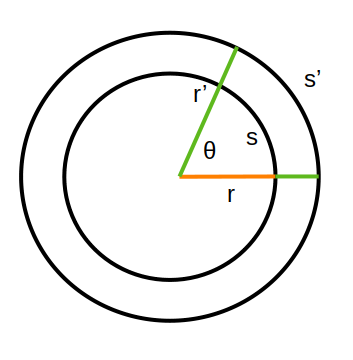

$$\theta = \frac{s}{r}= \frac{s'}{r'}$$


 Derivando $s=r\cdot \theta$  respecto del tiempo, obtenemos la relación entre la velocidad lineal y la velocidad angular:

$$\frac{\partial \theta}{\partial t}=r \frac{\partial s}{\partial t}$$

Nos queda que:

$$r=\frac{V}{\omega} $$

#### Entonces podemos calcular el radio para el primer camino circular que realiza el robot tomando las siguientes velocidades: 


 $$\omega_z= 0.2 \;\;\;\;\;\;  V_x=0.2$$
 
 $$r=\frac{V_x}{\omega_z}=\frac{0.2}{0.2}=1m$$
 


#### El radio para el segundo camino circular que realiza el robot tomando las siguientes velocidades, es: 


 $$\omega_z= 0.4 \;\;\;\;\;\;  V_x=0.2$$
 
 $$\frac{V_x}{\omega_z}=\frac{0.2}{0.4}=0.5m$$
 


### 2.
#### Sacando los datos del punto 1:

Para un radio de $0.5m$, las velocidades angulares y lineal son:

$$r=0.5= \frac{V}{\omega}=\frac{0.2}{0.4}$$

$$ V_x=0.2 m/s  \;\;\;\;\;\; \omega=0.4 rad/s$$



Para un radio de $1m$, las velocidades angulares y lineal son:

$$r=0.5= \frac{V}{\omega}=\frac{0.2}{0.2}$$

$$ V_x=0.2  \;\;\;\;\;\; \omega=0.2$$





### 3.
#### Haciendo el cociente entre la velocidad linear y angular para el primer camino circular, nos queda:

$$\frac{V}{\omega}=\frac {\frac{(\omega_R-\omega_L)\cdot R}{b}} {\frac{(\omega_R+\omega_L)\cdot R}{2}} = \frac{(\omega_R+\omega_L)\cdot b}{(\omega_R+\omega_L)\cdot 2}$$

Calculamos los valores de $\omega_R$ y $\omega_L$ reemplazando $b$:

$$\frac{0.2}{0.2}=\frac{(\omega_R+\omega_L)\cdot 0.450m}{(\omega_R+\omega_L)\cdot 2}$$

donde:

$$\omega_R= 1.75 rad/s   \;\;\;\;\;\;   \omega_L=1.107 rad/s$$

Reemplazandolos, confirmamos el valor del radio encontrado en el punto 1:

$$\frac{(\omega_R+\omega_L)\cdot 0.450m}{(\omega_R+\omega_L)\cdot 2}=0.9997m$$

#### Para el segundo camino circular:

$$\frac{V}{\omega}=\frac {\frac{(\omega_R-\omega_L)\cdot R}{b}} {\frac{(\omega_R+\omega_L)\cdot R}{2}} = \frac{(\omega_R+\omega_L)\cdot b}{(\omega_R+\omega_L)\cdot 2}$$


Calculamos los valores de $\omega_R$ y $\omega_L$ reemplazando $b$:

$$\frac{0.2}{0.4}=\frac{(\omega_R+\omega_L)\cdot 0.450m}{(\omega_R+\omega_L)\cdot 2}$$

donde:

$$\omega_R= 2.07 rad/s    \;\;\;\;\;\;   \omega_L=0.785 rad/s$$

Reemplazandolos, confirmamos el valor anterior:

$$\frac{(\omega_R+\omega_L)\cdot 0.450m}{(\omega_R+\omega_L)\cdot 2}=0.4999m$$

### 4. Registro de datos de movimiento del robot mediante teleoperación por teclado.

La siguiente tabla muestra los últimos 10 datos almacenados en un archivo .txt al hacer un camino dirigido por teleoperación en la simulación del RoMAA:

In [129]:
import io
import pandas as pd

pd.set_option('display.max_rows',8)
file_key = 'teleop.txt'
df = pd.read_csv(file_key, header = None, delim_whitespace=True)
df.columns = ['time', 'posX', 'posY', 'posYan', 'vel', 'velAngular']
df[:10]

time      posX      posY    posYan       vel  velAngular
0   252.834 -0.029493  0.024987  1.524976  0.307058   -0.262666
1   252.884 -0.028561  0.041959  1.521633  0.360132    0.026593
2   252.934 -0.027664  0.059357  1.525989  0.337319    0.158855
3   252.984 -0.026951  0.074873  1.540258  0.292692    0.330551
..      ...       ...       ...       ...       ...         ...
6   253.134 -0.026248  0.122792  1.572744  0.344691    0.117680
7   253.184 -0.026324  0.139977  1.578555  0.343679    0.114832
8   253.234 -0.026504  0.157433  1.582997  0.352436    0.073521
9   253.284 -0.026747  0.175212  1.585868  0.360893    0.035015

[10 rows x 6 columns]

### 5.
#### I) Camino seguido por el robot.

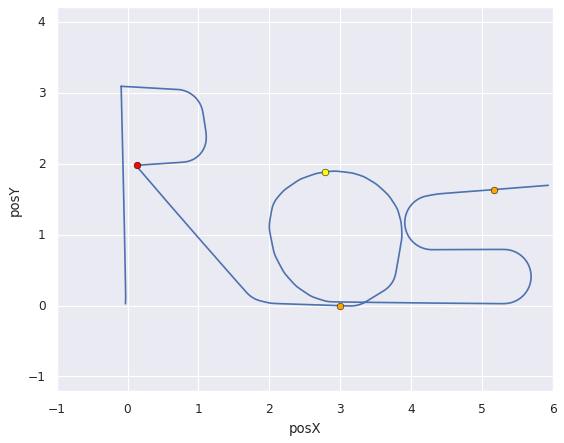

In [130]:
import seaborn as sns
import math
    
import matplotlib.pyplot as plt
plt.style.use('classic')
sns.set()

plt.axis('equal')
sns.lineplot(data=df, x="posX", y="posY",sort=False)

plt.plot(0.129005 ,1.98081 ,marker='o',color='red')
plt.plot(2.78036,1.883603,marker='o',color='yellow')
plt.plot(5.173292,1.637644,3,0,marker='o',color='orange')


plt.show() 


####  II) Trayectoria (pose respecto al tiempo) .

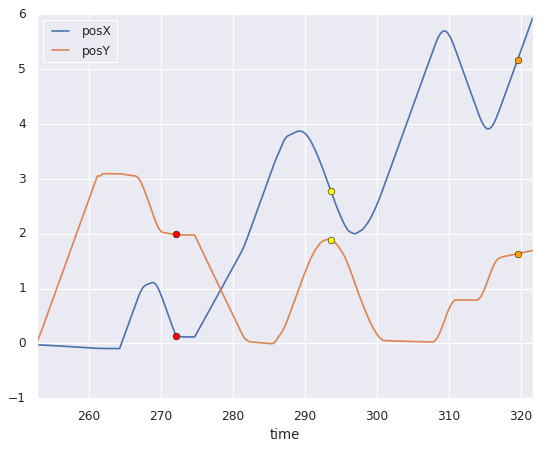

In [89]:
import io
import pandas as pd

pd.set_option('display.max_rows',8)
file_key = 'teleop.txt'

df = pd.read_csv(file_key, header = None, delim_whitespace=True)

df.columns = ['time', 'posX', 'posY', 'posYan', 'vel', 'velAngular']

df.plot(x='time', y=['posX','posY'])

plt.plot(272.134, 0.129004,marker='o',color='red')
plt.plot(272.134,1.98984,marker='o',color='red')

plt.plot(293.634,2.78036,marker='o',color='yellow')
plt.plot(293.634,1.883603,marker='o',color='yellow')


plt.plot(319.584,5.173292,marker='o',color='orange')

plt.plot(319.584,1.637644,marker='o',color='orange')


#### III) Velocidad del robot respecto al tiempo.

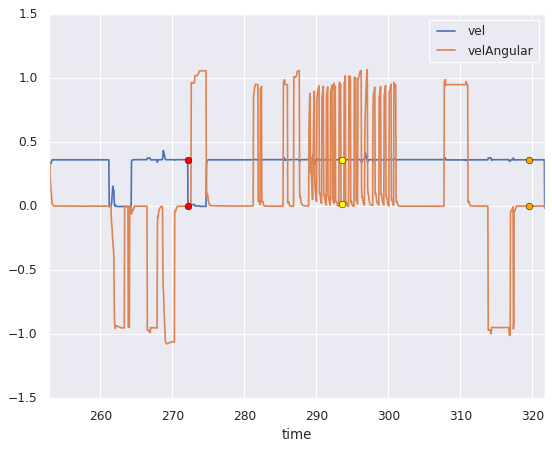

In [90]:
df.plot(x='time', y=['vel' , 'velAngular'])

plt.plot(272.134, 0.3646838593294256,marker='o',color='red')
plt.plot(272.134,0.0010170794297969146,marker='o',color='red')

plt.plot(293.634,0.36398227656995275,marker='o',color='yellow')
plt.plot(293.634,0.01785897482272463,marker='o',color='yellow')


plt.plot(319.584,0.36354199069439147,marker='o',color='orange')
plt.plot(319.584,0.0016282526359451947,marker='o',color='orange')


### 6. Registro de datos para camino circular.


La siguiente tabla muestra los últimos 10 datos almacenados en un registro de datos sacados de la simulación al hacer un camino circular.

Las velocidades aplicadas en la simulación son:

$$v=0.2\frac{m}{s}  \;\;\;\;\;\;    \omega=0.4 \frac{rad}{s}$$


In [140]:
import io
import pandas as pd

pd.set_option('display.max_rows',8)
file_key = 'log.txt'
df = pd.read_csv(file_key, header = None, delim_whitespace=True)
df.columns = ['time', 'posX', 'posY', 'posYan', 'vel', 'velAngular']
df[:10]

time      posX      posY    posYan       vel  velAngular
0   1213.312 -0.025276  0.346371  1.049538  0.198709    0.382774
1   1213.360 -0.020410  0.355039  1.068618  0.198711    0.382749
2   1213.412 -0.015709  0.363799  1.087697  0.198712    0.382720
3   1213.467 -0.011238  0.372543  1.107395  0.197298    0.396889
..       ...       ...       ...       ...       ...         ...
6   1213.612  0.001071  0.399152  1.167096  0.194702    0.397876
7   1213.662  0.004814  0.408170  1.186978  0.197339    0.397233
8   1213.711  0.008375  0.417257  1.206869  0.195159    0.397095
9   1213.761  0.011757  0.426416  1.226763  0.194869    0.400743

[10 rows x 6 columns]

Los datos a continuación son los usados para marcar los puntos (P1,P2,P3) en los distintos gráficos solicitados, que se encuentran a continuación:

| Datos |Punto1| Punto2 | Punto3 |
| :-: | :-: | :-: | :-: |
| time | 1213.812000 | 1220.312000 | 1227.331000 |
| posX | 0.014961 | -0.765575 | -0.412598 |
| posY | 0.435656 | 1.033222 | 0.088900 |
| posYan | 1.246597 | -2.553334 | 0.129801 |
| vel | 0.195357 | 0.198659 | 0.198670 |
| velAngular | 0.396186 | 0.381951 | 0.381667 |
| Posición en tabla | 10 | 140 | 280 |



In [141]:
df.iloc[10]

time          1213.812000
posX             0.014961
posY             0.435656
posYan           1.246597
vel              0.195357
velAngular       0.396186
Name: 10, dtype: float64

In [142]:
df.iloc[140]

time          1220.312000
posX            -0.765575
posY             1.033222
posYan          -2.553334
vel              0.198659
velAngular       0.381951
Name: 140, dtype: float64

In [143]:
df.iloc[280]

time          1227.331000
posX            -0.412598
posY             0.088900
posYan           0.129801
vel              0.198670
velAngular       0.381667
Name: 280, dtype: float64

#### I) Camino seguido por el robot.

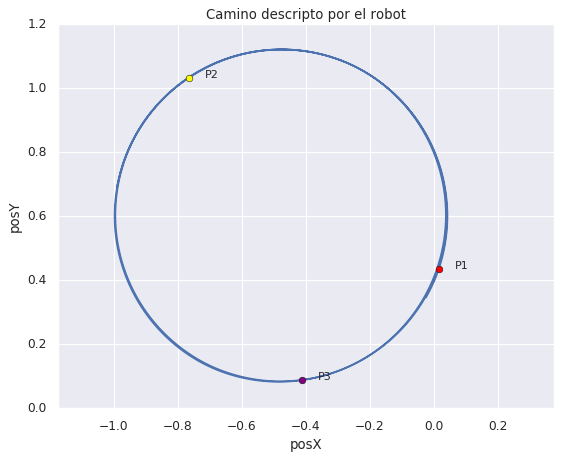

In [144]:
import seaborn as sns
import math
    
import matplotlib.pyplot as plt
plt.style.use('classic')
sns.set()

plt.axis('equal')
sns.lineplot(data=df, x="posX", y="posY",sort=False)

plt.plot(0.014962,0.435656,marker='o',color='red')
plt.plot(-0.765575,1.033222,marker='o',color='yellow')
plt.plot(-0.412598,0.088900,marker='o',color='purple')

plt.text(0.014962+0.05,0.435656, 'P1', fontsize = 10)
plt.text(-0.765575+0.05,1.033222, 'P2', fontsize = 10)
plt.text(-0.4125985+0.05,0.088900, 'P3', fontsize = 10)

plt.title("Camino descripto por el robot")
plt.show()

####  II) Trayectoria (pose respecto al tiempo) .


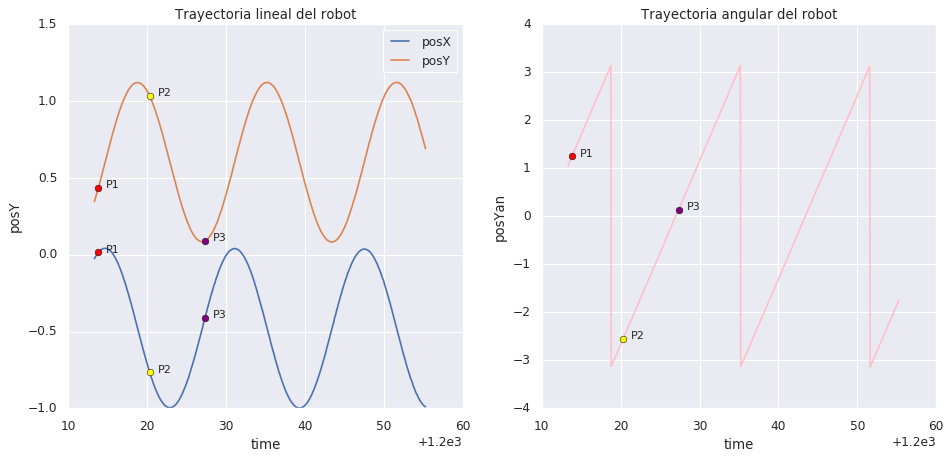

In [134]:
import io
import pandas as pd

pd.set_option('display.max_rows',8)
file_key = 'log.txt'

df = pd.read_csv(file_key, header = None, delim_whitespace=True)

df.columns = ['time', 'posX', 'posY', 'posYan', 'vel', 'velAngular']

plt.figure(figsize=(14,6))
plt.subplot(121)

sns.lineplot(data=df, x="time", y=("posX"), label='posX')
sns.lineplot(data=df, x="time", y=("posY"), label='posY')
plt.title("Trayectoria lineal del robot")

plt.plot(1213.812,0.014962,marker='o',color='red')
plt.plot(1213.812,0.435656,marker='o',color='red')

plt.plot(1220.312,-0.765575,marker='o',color='yellow')
plt.plot(1220.312,1.033222,marker='o',color='yellow')

plt.plot(1227.331,-0.412598,marker='o',color='purple')
plt.plot(1227.331,0.088900,marker='o',color='purple')



plt.text(1213.812+1,0.014962, 'P1', fontsize = 10)
plt.text(1213.812+1,0.435656, 'P1', fontsize = 10)

plt.text(1220.312+1,-0.765575, 'P2', fontsize = 10)
plt.text(1220.312+1,1.033222, 'P2', fontsize = 10)

plt.text(1227.331+1,-0.412598, 'P3', fontsize = 10)
plt.text(1227.331+1,0.088900, 'P3', fontsize = 10)




plt.subplot(122)
sns.lineplot(data=df, x="time", y="posYan", color="pink")
plt.title("Trayectoria angular del robot")

plt.plot(1213.812, 1.246597,marker='o',color='red')
plt.plot(1220.312,-2.553334,marker='o',color='yellow')
plt.plot(1227.331, 0.129801,marker='o',color='purple')

plt.text(1213.812+1,1.246597, 'P1', fontsize = 10)
plt.text(1220.312+1,-2.553334, 'P2', fontsize = 10)
plt.text(1227.331+1,0.129801, 'P3', fontsize = 10)

plt.show()

#### III) Velocidad del robot respecto al tiempo.

<Figure size 1120x480 with 0 Axes>

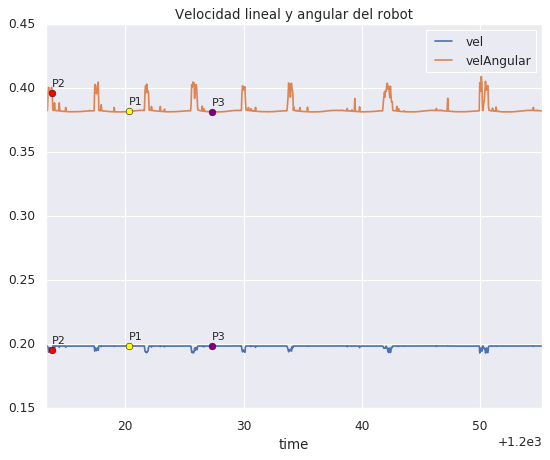

In [135]:
plt.figure(figsize=(14,6))

df.plot(x='time', y=['vel' , 'velAngular'])

plt.plot(1213.812, 0.195357,marker='o',color='red')
plt.plot(1213.812,0.396186,marker='o',color='red')

plt.plot(1220.312,0.198659,marker='o',color='yellow')
plt.plot(1220.312,0.381951,marker='o',color='yellow')


plt.plot(1227.331,0.198670,marker='o',color='purple')
plt.plot(1227.331,0.381667,marker='o',color='purple')




plt.text(1213.812, 0.195357+0.005, 'P2', fontsize = 10)
plt.text(1213.812,0.396186+0.005, 'P2', fontsize = 10)

plt.text(1220.312,0.198659+0.005, 'P1', fontsize = 10)
plt.text(1220.312,0.381951+0.005, 'P1', fontsize = 10)

plt.text(1227.331,0.198670+0.005, 'P3', fontsize = 10)
plt.text(1227.331,0.381667+0.005, 'P3', fontsize = 10)

plt.title("Velocidad lineal y angular del robot")
plt.show()

### 8.  Rango de valores de $x$ e $y$ :

En eje $x$ el rango es: $$ -0.998276 \;\;\;\;\;\;  a  \;\;\;\;\;\;  0.040098$$


En eje $y$ el rango es: $$ 0.084956 \;\;\;\;\;\; a \;\;\;\;\;\;  1.121044$$

Estos valores se corresponden a los registrados en este circuito en particular, sin embargo la interfaz gráfica del software Gazebo tiene un rango desde -5 hasta 5 en ambos ejes. Podemos asumir que en la realidad, el rango de valores dependerá del tamaño físico disponible para el robot. 

### 9.Rango de valores de  la orientación del robot:

$$-\pi  \;\;\;\;\;\;   a   \;\;\;\;\;\;   +\pi$$

El rango de valores para la orientación del robot está limitado a un circulo debido a que los valores vuelven a repetirse. Por convención, en lugar de tratar al circulo con valores de $$ 0\; a\; 2\pi$$ el programa usa ángulos positivos de $$ 0\; a\; \pi $$ para el semicirculo en sentido antihorario de giro, y valores de $$ 0\; a\; -\pi$$ para el semicirculo en sentido horario de giro.

### 10. Sentido de avance del robot

Analizando la velocidad lineal y angular del robot, se puede predecir cual es el sentido de giro del robot.

En la siguiente tabla se muestra cual es sentido de giro de acuerdo a $v$ y $\omega$:

|Círculo| v | $\omega$ | Sentido de giro |
| :-: | :-: | :-: | :-: |
| C1 | $>0$ | $>0$ | Antihorario|
| C2 | $>0$ | $<0$ | Horario|
| C3 | $<0$ | $<0$ | Horario|
| C4 | $<0$ | $>0$ | Antihorario|



#### El circulo C1 tiene el sentido de avance antihorario con los valores de velocidad:
$$v=0.3 \frac{m}{s}  \;\;\;\;\;\;    \omega=0.3 \frac{rad}{s}$$

#### El circulo C2 tiene el sentido de avance horario con los valores de velocidad:
$$v=0.4 \frac{m}{s} \;\;\;\;\;\;    \omega=-0.2 \frac{rad}{s}$$

#### El circulo C3  tiene el sentido de avance horario con los valores de velocidad:
$$v=-0.2 \frac{m}{s}  \;\;\;\;\;\;    \omega=-0.4 \frac{rad}{s}$$

#### El circulo C4 tiene el sentido de avance antihorario con los valores de velocidad:
$$v=-0.2 \frac{m}{s} \;\;\;\;\;\;    \omega=0.1 \frac{rad}{s}$$

In [137]:
import io
import pandas as pd
import seaborn as sns
import math

pd.set_option('display.max_rows',8)

file_key = 'circulos.txt'
df = pd.read_csv(file_key, header = None, delim_whitespace=True)

df.columns = ['time', 'posX', 'posY', 'posYan', 'vel', 'velAngular']
df[:10]


time      posX      posY    posYan       vel  velAngular
0   289.463  6.496824  3.936509  1.060052 -0.001265   -0.003378
1   289.513  6.496782  3.936424  1.059920 -0.001328   -0.003312
2   289.562  6.496741  3.936339  1.059786 -0.001265   -0.003379
3   289.612  6.496699  3.936254  1.059653 -0.001328   -0.003313
..      ...       ...       ...       ...       ...         ...
6   289.761  6.496575  3.935998  1.059253 -0.001265   -0.003380
7   289.813  6.496533  3.935914  1.059120 -0.001327   -0.003315
8   289.863  6.496492  3.935828  1.058986 -0.001265   -0.003381
9   289.913  6.496450  3.935743  1.058853 -0.001327   -0.003316

[10 rows x 6 columns]

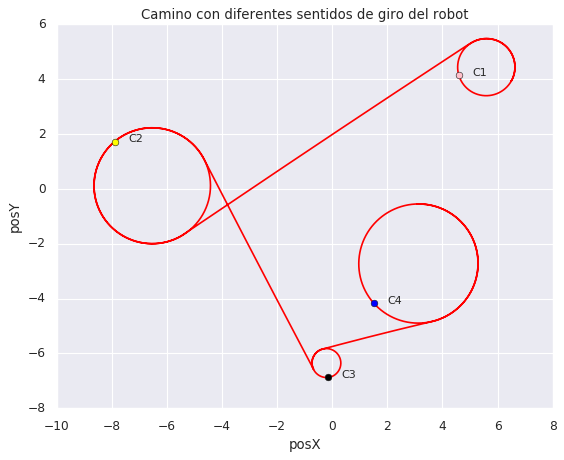

In [138]:

plt.axis('equal')
sns.lineplot(data = df, x="posX", y="posY", sort=False, color="red")
plt.title("Camino con diferentes sentidos de giro del robot")

plt.plot(4.594827674892508,4.1405695945338605, marker="o",color="pink")
plt.text(4.594827674892508+0.5,4.1405695945338605, 'C1', fontsize = 10)

plt.plot(-7.900462761975075,1.7239138425789384, marker="o",color="yellow")
plt.text(-7.900462761975075+0.5,1.7239138425789384, 'C2', fontsize = 10)

plt.plot(-0.15938864905476474, -6.875302113898716, marker="o",color="black")
plt.text(-0.15938864905476474+0.5, -6.875302113898716, 'C3', fontsize = 10)

plt.plot(1.514220842001235, -4.17434521974795, marker="o",color="blue")
plt.text(1.514220842001235+0.5, -4.17434521974795, 'C4', fontsize = 10)





plt.show()

### 11.
#### La secuencia de comandos de velocidad aplicado al robot para seguir el siguiente camino es:
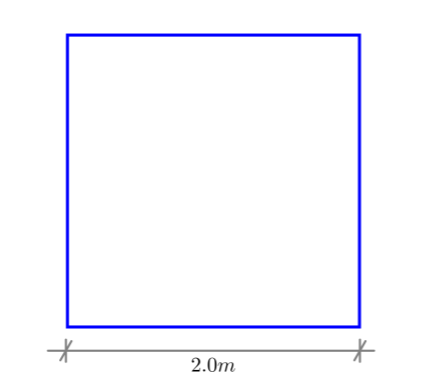

En este recorrido tenemos:

$$ V=0.5 m/s  \;\;\;\;\; \rightarrow 4seg. \;\;\;\;\;\;  V=0 m/s  \;\;\;\;\;\; \rightarrow 1seg. $$
$$ \omega=0 rad/s  \;\;\;\;\;\;\;\;    \rightarrow 4seg. \;\;\;\;\;\; \omega= \frac{\pi}{2} rad/s  \;\;\;\; \rightarrow 1seg. $$

A estas velocidades las repetimos 4 veces.

   1. rostopic pub -1 /cmd_vel geometry_msgs/Twist ’[0.5,0,0]’ ’[0,0,0]’ 
        * *esperar 4 segundos* 
   * rostopic pub -1 /cmd_vel geometry_msgs/Twist ’[0,0,0]’ ’[0,0,1.57]’ 
       * *esperar 1 segundo*
   * rostopic pub -1 /cmd_vel geometry_msgs/Twist ’[0.5,0,0]’ ’[0,0,0]’ 
       * *esperar 4 segundos* 
   * rostopic pub -1 /cmd_vel geometry_msgs/Twist ’[0,0,0]’ ’[0,0,1.57]’ 
       * *esperar 1 segundo*
   * rostopic pub -1 /cmd_vel geometry_msgs/Twist ’[0.5,0,0]’ ’[0,0,0]’ 
       * *esperar 4 segundos* 
   * rostopic pub -1 /cmd_vel geometry_msgs/Twist ’[0,0,0]’ ’[0,0,1.57]’ 
       * *esperar 1 segundo*
   * rostopic pub -1 /cmd_vel geometry_msgs/Twist ’[0.5,0,0]’ ’[0,0,0]’ 
       * *esperar 4 segundos* 
   * rostopic pub -1 /cmd_vel geometry_msgs/Twist ’[0,0,0]’ ’[0,0,1.57]’ 
       * *esperar 1 segundo*

#### La secuencia de comandos de velocidad aplicado al robot para seguir el siguiente camino es:
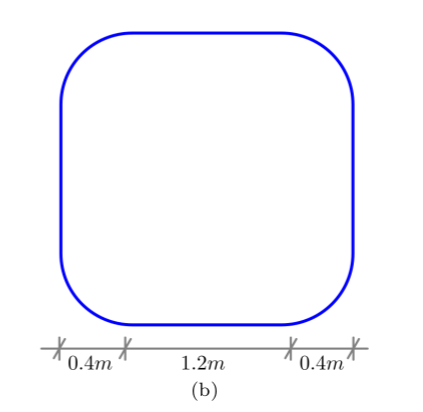

En este recorrido tenemos:

$$r=\frac{V}{\omega} \rightarrow 0.4=\frac{0.3}{\omega} \rightarrow \omega=\frac{0.3}{0.4}=0.75$$
$$t=\frac{\frac{\pi}{2}}{0.75}= \frac{2*\pi}{3}=2.094 s$$

$$ V=0.3 m/s  \;\;\;\;\; \rightarrow 4seg. \;\;\;\;\;\;  V=0.3 m/s  \;\;\;\;\;\; \rightarrow 2.1seg. $$
$$ \omega=0 rad/s  \;\;\;\;\;\;\;\;    \rightarrow 4seg. \;\;\;\;\;\; \omega= 0.75 rad/s  \;\;\;\; \rightarrow 2.1seg. $$

A estas velocidades las repetimos 4 veces.

1. rostopic pub -1 /cmd_vel geometry_msgs/Twist ’[0.3,0,0]’ ’[0,0,0]’ 
  * *esperar 4 segundos* 
* rostopic pub -1 /cmd_vel geometry_msgs/Twist ’[0.3,0,0]’ ’[0,0,0.75]’ 
 * *esperar 2.1 segundos*
* rostopic pub -1 /cmd_vel geometry_msgs/Twist ’[0.3,0,0]’ ’[0,0,0]’ 
 * *esperar 4 segundos* 
* rostopic pub -1 /cmd_vel geometry_msgs/Twist ’[0.3,0,0]’ ’[0,0,0.75]’ 
 * *esperar 2.1 segundos* 
* rostopic pub -1 /cmd_vel geometry_msgs/Twist ’[0.3,0,0]’ ’[0,0,0]’ 
 * *esperar 4 segundos* 
* rostopic pub -1 /cmd_vel geometry_msgs/Twist ’[0.3,0,0]’ ’[0,0,0.75]’ 
 * *esperar 2.1 segundos* 
* rostopic pub -1 /cmd_vel geometry_msgs/Twist ’[0.3,0,0]’ ’[0,0,0]’ 
 * *esperar 4 segundos* 
* rostopic pub -1 /cmd_vel geometry_msgs/Twist ’[0.3,0,0]’ ’[0,0,0.75]’ 
 * *esperar 2.1 segundos*

### Conclusiones:
   Este trabajo sirvió como introducción tanto al uso de software orientado a la programación de robots, como el ROS y el entorno gráfico Gazebo, como a la cinemática que controla el movimiento de robots manejados por tracción diferencial. Esto queda en evidencia al final del trabajo, donde llegamos a la secuencia de comandos que serían necesarios para que el robot siga un recorrido tanto recto como curvo.
   Si bien en la práctica esto puede que sea insuficiente para reproducir el trayecto deseado, pues el robot desconoce si su posición en el mundo es la que tiene registrada, sigue siendo una introducción bastante aceptable al manejo de los mismos.